In [3]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/rohan/Documents/betflare/BetHistory20170127_Bet_SortOnDate_Descending.csv')
print(data)

     bet_status     date_placed             type  \
0          Lose  25/01/17 15:16           Soccer   
1    Cashed Out  25/01/17 15:16           Soccer   
2          Lose  25/01/17 15:16           Soccer   
3          Lose  20/01/17 17:54           Soccer   
4           Win  20/01/17 17:54           Soccer   
5           Win  20/01/17 17:54           Soccer   
6           Win  20/01/17 17:54           Soccer   
7           Win  20/01/17 17:54           Soccer   
8           Win  20/01/17 17:54           Soccer   
9           Win  20/01/17 17:54           Soccer   
10          Win  20/01/17 17:54           Soccer   
11         Lose  20/01/17 17:54           Soccer   
12          Win  20/01/17 17:54           Soccer   
13         Lose  20/01/17 17:54           Soccer   
14          Win  20/01/17 17:54           Soccer   
15         Lose  19/01/17 17:33           Soccer   
16          Win  19/01/17 17:33           Soccer   
17          Win  19/01/17 17:33           Soccer   
18          

In [4]:
data = data.fillna('')

#add index and remove other sports
data = data[['bet_status', 'date_placed', 'type', 'bet_details', 'odds', 'stake', 'return', 'bet_type']]

soccer_data = data
sport = (soccer_data['type']) == 'Soccer'
soccer_data = soccer_data[sport]

soccer_data['date_placed'] = pd.to_datetime(soccer_data['date_placed'])
soccer_data = soccer_data.sort_values(by='date_placed', ascending=1)
soccer_data = soccer_data.reset_index(drop=True)
soccer_data.loc[:,'net_return'] = soccer_data['return'] - soccer_data['stake']

soccer_data.head()
# sample rows data.sample(n=5)

/Users/rohan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,bet_status,date_placed,type,bet_details,odds,stake,return,bet_type,net_return
0,Lose,2015-01-10 18:06:00,Soccer,Multibet (Doubles),6.56,5.0,0.0,Multibet,-5.0
1,Lose,2015-01-10 18:10:00,Soccer,Multibet (Doubles),10.2,3.0,0.0,Multibet,-3.0
2,Lose,2015-01-10 18:12:00,Soccer,Multibet (Doubles),13.5,3.0,0.0,Multibet,-3.0
3,Lose,2015-01-15 16:59:00,Soccer,Multibet (5 folds),138.91,5.0,0.0,Multibet,-5.0
4,Lose,2015-01-15 19:42:00,Soccer,Multibet (Trebles),4.49,2.0,0.0,Multibet,-2.0


In [5]:
soccer_data.dtypes

bet_status             object
date_placed    datetime64[ns]
type                   object
bet_details            object
odds                   object
stake                 float64
return                float64
bet_type               object
net_return            float64
dtype: object

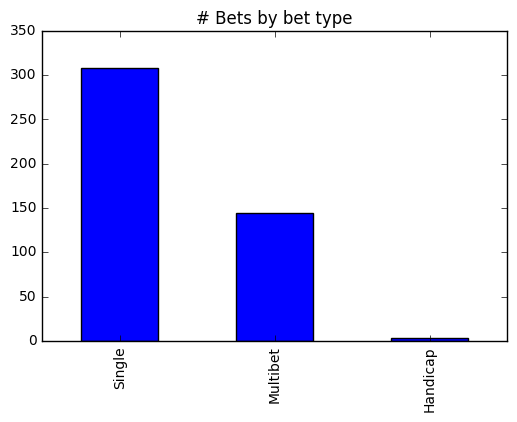

In [6]:
soccer_data['bet_type'].value_counts().plot(kind='bar',title = '# Bets by bet type')

In [7]:
# win rate

lose = soccer_data['bet_status'].value_counts()[0]
win = soccer_data['bet_status'].value_counts()[1]
cashed_out = soccer_data['bet_status'].value_counts()[2]
total_bet_count = lose + win + cashed_out
float(win) / total_bet_count

0.2967032967032967

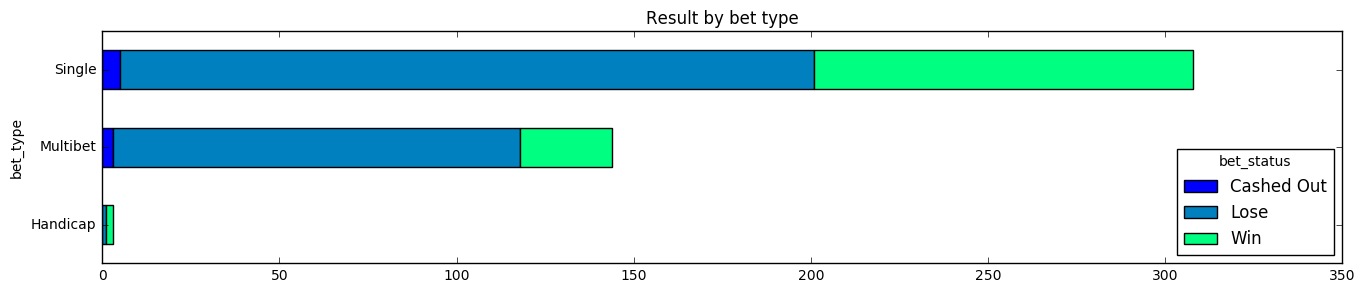

In [8]:
result_by_type = soccer_data.groupby(['bet_type', 'bet_status'])
result_by_type = result_by_type.size().unstack()
result_by_type.plot(kind='barh', stacked=True, figsize=[16,3], colormap = 'winter', title = 'Result by bet type')

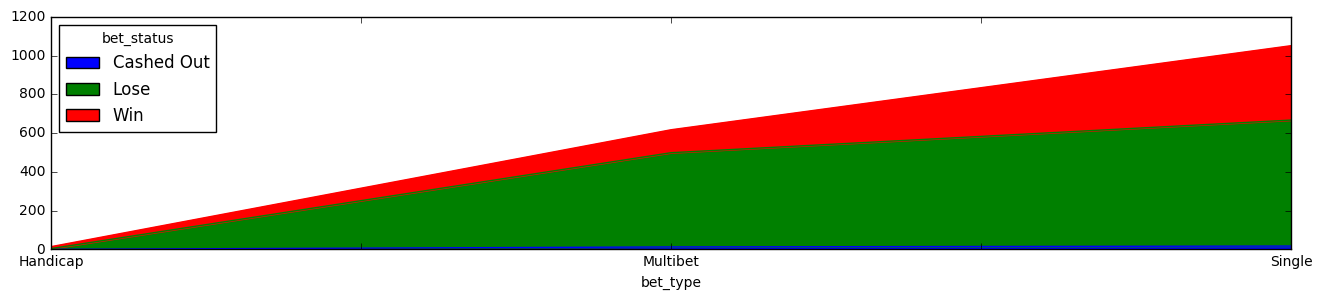

In [9]:
return_by_bet_type = soccer_data.pivot_table(index='bet_type', columns='bet_status', values='stake', aggfunc='sum')
return_by_bet_type.plot(kind='area', stacked=True, figsize=[16,3])
#return_by_bet_type.head()

In [10]:
result_by_type = result_by_type.reset_index()
result_by_type['win_rate'] = result_by_type['Win'] / (result_by_type['Win'] + result_by_type['Lose'])
result_by_type

bet_status,bet_type,Cashed Out,Lose,Win,win_rate
0,Handicap,NaN,1.0,2.0,0.666667
1,Multibet,3.0,115.0,26.0,0.184397
2,Single,5.0,196.0,107.0,0.353135


In [11]:
#stacked bar of wins and losses by month

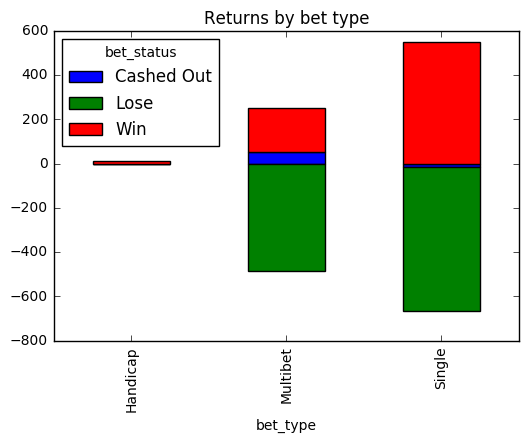

In [12]:
net_return_by_bet_type = soccer_data.pivot_table(index='bet_type', columns= 'bet_status', values='net_return', aggfunc='sum')
net_return_by_bet_type.head()
net_return_by_bet_type.plot(kind='bar', stacked=True, title='Returns by bet type')

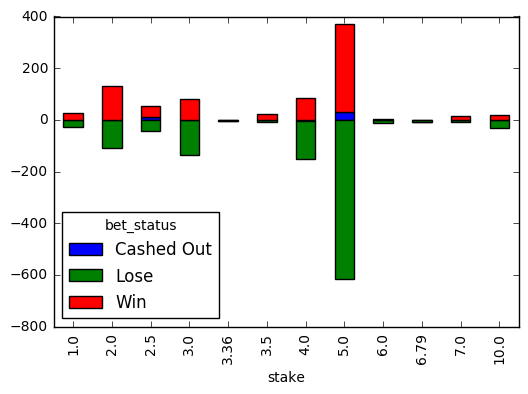

In [13]:
net_returns_by_stake = soccer_data.pivot_table(index='stake',columns='bet_status', values='net_return', aggfunc='sum')
net_returns_by_stake.head()
net_returns_by_stake.plot(kind='bar', stacked=True)

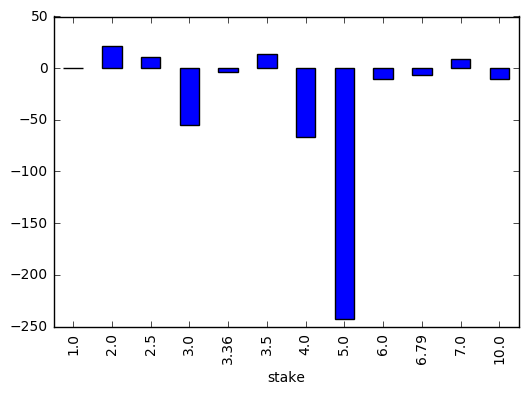

In [14]:
net_return_by_stake = soccer_data.pivot_table(index='stake', values='net_return', aggfunc='sum')
net_return_by_stake.plot(kind='bar')

In [15]:
soccer_data['net_return'].describe()

count    455.000000
mean      -0.746879
std        5.510309
min      -10.000000
25%       -5.000000
50%       -2.500000
75%        1.995000
max       34.020000
Name: net_return, dtype: float64

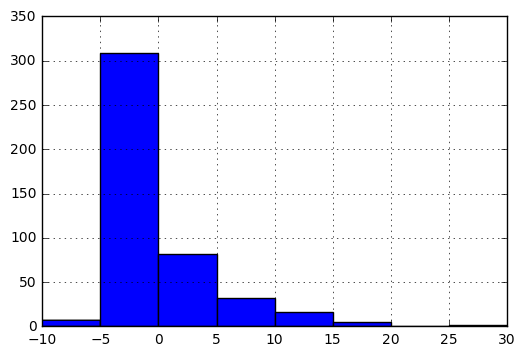

In [16]:
bin_values = np.arange(start=-10, stop=35, step=5)
soccer_data['net_return'].hist(bins=bin_values)

In [17]:
dfb = soccer_data
dfb['cum_return'] = dfb.net_return.cumsum()

dfb.head()

,bet_status,date_placed,type,bet_details,odds,stake,return,bet_type,net_return,cum_return
0,Lose,2015-01-10 18:06:00,Soccer,Multibet (Doubles),6.56,5.0,0.0,Multibet,-5.0,-5.0
1,Lose,2015-01-10 18:10:00,Soccer,Multibet (Doubles),10.2,3.0,0.0,Multibet,-3.0,-8.0
2,Lose,2015-01-10 18:12:00,Soccer,Multibet (Doubles),13.5,3.0,0.0,Multibet,-3.0,-11.0
3,Lose,2015-01-15 16:59:00,Soccer,Multibet (5 folds),138.91,5.0,0.0,Multibet,-5.0,-16.0
4,Lose,2015-01-15 19:42:00,Soccer,Multibet (Trebles),4.49,2.0,0.0,Multibet,-2.0,-18.0


In [18]:
dfc = dfb['cum_return'].reset_index().rename(columns={'index':'bet_number'})
dfc.loc[:,'bet_number'] = dfc['bet_number'] +1


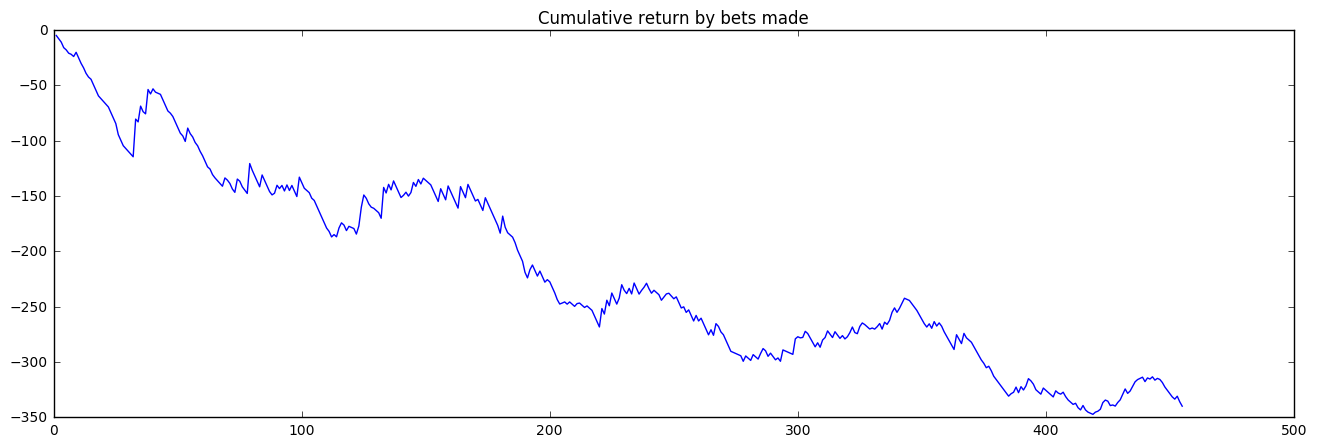

In [19]:
plt.figure(figsize=(16,5))
plt.plot(dfc['bet_number'],dfc['cum_return'])
plt.title('Cumulative return by bets made')
plt.show()